In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls -lh /scratch/brown/train52/data/

total 77G
-rw-r--r-- 1 train52 student  76G Mar 23 10:05 gsod.obs.csv
-rw-r--r-- 1 train52 student 2.1M Mar 23 10:05 gsod.stn.csv
-rw-r--r-- 1 train52 student 6.9K Mar 23 10:52 gsod.stn_onlyIN.csv
-rw-r--r-- 1 train52 student 577M Mar 23 13:09 obs_IN.csv


In [3]:
data = pd.read_csv("/scratch/brown/train52/data/obs_IN.csv")
data.head(10)

,call_name,country,date_end,date_start,datetime,elevation,latitude,longitude,measure_id,measure_ref,measure_value,state,station_id,station_name,wban_id
0,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,2.0,18.0,24.4,IN,724361,COLUMBUS BAKALAR,13803
1,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,14.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
2,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,10.0,1.0,33.4,IN,724361,COLUMBUS BAKALAR,13803
3,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,11.0,9.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
4,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,15.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
5,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,9.0,1.0,55.4,IN,724361,COLUMBUS BAKALAR,13803
6,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,6.0,18.0,5.2,IN,724361,COLUMBUS BAKALAR,13803
7,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,18.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
8,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,5.0,18.0,73.7,IN,724361,COLUMBUS BAKALAR,13803
9,KBAK,US,19900206,19430501,1943/05/01,199.9,39.267,-85.9,17.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803


In [4]:
data_new = data.drop(['call_name', 'date_end', 'date_start'], axis=1)

In [5]:
for cols in list(data_new.columns):
    print(cols, "null ", data_new[cols].isnull().sum())

country null  0
datetime null  0
elevation null  0
latitude null  0
longitude null  0
measure_id null  0
measure_ref null  0
measure_value null  0
state null  0
station_id null  0
station_name null  0
wban_id null  0


In [6]:
data_new.head(10)

,country,datetime,elevation,latitude,longitude,measure_id,measure_ref,measure_value,state,station_id,station_name,wban_id
0,US,1943/05/01,199.9,39.267,-85.9,2.0,18.0,24.4,IN,724361,COLUMBUS BAKALAR,13803
1,US,1943/05/01,199.9,39.267,-85.9,14.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
2,US,1943/05/01,199.9,39.267,-85.9,10.0,1.0,33.4,IN,724361,COLUMBUS BAKALAR,13803
3,US,1943/05/01,199.9,39.267,-85.9,11.0,9.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
4,US,1943/05/01,199.9,39.267,-85.9,15.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
5,US,1943/05/01,199.9,39.267,-85.9,9.0,1.0,55.4,IN,724361,COLUMBUS BAKALAR,13803
6,US,1943/05/01,199.9,39.267,-85.9,6.0,18.0,5.2,IN,724361,COLUMBUS BAKALAR,13803
7,US,1943/05/01,199.9,39.267,-85.9,18.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803
8,US,1943/05/01,199.9,39.267,-85.9,5.0,18.0,73.7,IN,724361,COLUMBUS BAKALAR,13803
9,US,1943/05/01,199.9,39.267,-85.9,17.0,0.0,0.0,IN,724361,COLUMBUS BAKALAR,13803


In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409309 entries, 0 to 5409308
Data columns (total 12 columns):
country          object
datetime         object
elevation        float64
latitude         float64
longitude        float64
measure_id       float64
measure_ref      float64
measure_value    float64
state            object
station_id       int64
station_name     object
wban_id          int64
dtypes: float64(6), int64(2), object(4)
memory usage: 495.2+ MB


In [8]:
print(data_new['state'].value_counts())
print(data_new['country'].value_counts())

IN    5409309
Name: state, dtype: int64
US    5409309
Name: country, dtype: int64


In [9]:
data_new.shape

(5409309, 12)

In [29]:
#Mean Temp
criterion_temp = data_new['measure_id'] == 1.0
# max temp
criterion_mtemp = data_new['measure_id'] == 9.0
#max gust speed
criterion_gust_speed = data_new['measure_id'] == 8.0
#criterion_ppt = data_new['measure_id'] == 8.0
data_temp = data_new[criterion_temp]
data_mtemp = data_new[criterion_mtemp]
data_gust_speed = data_new[criterion_gust_speed]

In [30]:
print(data_temp.shape)
print(data_mtemp.shape)
print(data_gust_speed.shape)

(350297, 12)
(350094, 12)
(139885, 12)


In [12]:
data_temp.head(10)

,country,datetime,elevation,latitude,longitude,measure_id,measure_ref,measure_value,state,station_id,station_name,wban_id
12,US,1943/05/01,199.9,39.267,-85.9,1.0,18.0,45.0,IN,724361,COLUMBUS BAKALAR,13803
24,US,1943/12/13,199.9,39.267,-85.9,1.0,24.0,21.6,IN,724361,COLUMBUS BAKALAR,13803
36,US,1943/05/02,199.9,39.267,-85.9,1.0,24.0,51.1,IN,724361,COLUMBUS BAKALAR,13803
53,US,1943/05/03,199.9,39.267,-85.9,1.0,24.0,57.6,IN,724361,COLUMBUS BAKALAR,13803
63,US,1943/05/05,199.9,39.267,-85.9,1.0,24.0,66.7,IN,724361,COLUMBUS BAKALAR,13803
83,US,1943/05/06,199.9,39.267,-85.9,1.0,24.0,75.1,IN,724361,COLUMBUS BAKALAR,13803
86,US,1943/06/02,199.9,39.267,-85.9,1.0,24.0,79.1,IN,724361,COLUMBUS BAKALAR,13803
107,US,1943/06/04,199.9,39.267,-85.9,1.0,24.0,79.7,IN,724361,COLUMBUS BAKALAR,13803
122,US,1943/06/09,199.9,39.267,-85.9,1.0,24.0,70.2,IN,724361,COLUMBUS BAKALAR,13803
127,US,1943/06/18,199.9,39.267,-85.9,1.0,24.0,71.9,IN,724361,COLUMBUS BAKALAR,13803


In [32]:
# Max observable temperature
print(data_mtemp.sort_values(by=['measure_value'], ascending=False).head(1))
# Max gust speed
print(data_gust_speed.sort_values(by=['measure_value'], ascending=False).head(1))

        country    datetime  elevation  latitude  longitude  measure_id  \
3076115      US  2004/09/30      259.0    41.267    -85.833         9.0   

         measure_ref  measure_value state  station_id      station_name  \
3076115          1.0          127.4    IN      720266  WARSAW MUNICIPAL   

         wban_id  
3076115    99999  
        country    datetime  elevation  latitude  longitude  measure_id  \
4511802      US  2014/02/21      180.1    41.617    -87.417         8.0   

         measure_ref  measure_value state  station_id          station_name  \
4511802          0.0           85.5    IN      725337  GARY/CHICAGO AIRPORT   

         wban_id  
4511802     4807  


In [14]:
date = data_temp.datetime.apply(str)
date = date.str.split('[/-]', expand=True)

In [15]:
data_temp['year'] = date[0]
data_temp['month'] = date[1]

/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
k1_temp = np.sort(data_temp['year'].unique())

In [17]:
k2_temp = data_temp.groupby('year', as_index=False)['measure_value'].mean()
k3_temp = data_temp.groupby('year', as_index=False)['measure_ref'].mean()

In [18]:
import matplotlib.pyplot as plt

In [19]:
k2_temp = k2_temp.values
k3_temp = k3_temp.values

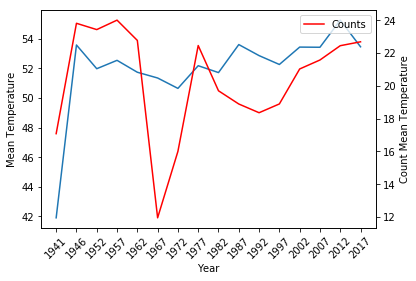

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(k2_temp[::5,0], k2_temp[::5,1], label="Mean Temp")
ax2 = ax1.twinx()
ax2.plot(k3_temp[::5,0], k3_temp[::5,1], color='red', label="Counts")
ax1.set_xlabel("Year")
ax1.set_ylabel("Mean Temperature")
ax2.set_ylabel("Count Mean Temperature")
ax1.set_xticklabels(k3_temp[::5,0], rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=[1,1])
plt.show()
#1967 blizzard

In [21]:
#Snow 
criterion_snow = data_new['measure_id'] == 12.0
data_snow = data_new[criterion_snow]

In [22]:
date = data_snow.datetime.apply(str)
date = date.str.split('[/-]', expand=True)

In [23]:
data_snow['year'] = date[0]
data_snow['month'] = date[1]

/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
k1_snow = np.sort(data_snow['year'].unique())

In [25]:
k2_snow = data_snow.groupby('year', as_index=False)['measure_value'].mean()

In [26]:
k2_snow = k2_snow.values

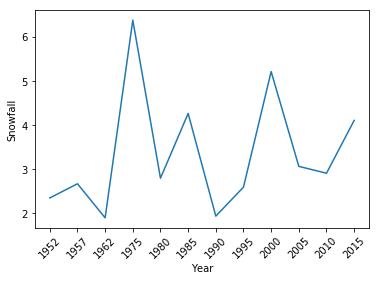

In [28]:
plt.plot(k2_snow[::5,0], k2_snow[::5,1], label="Snow Inch")
plt.xlabel("Year")
plt.ylabel("Snowfall")
plt.xticks(rotation=45)
plt.show()

In [33]:
date = data_gust_speed.datetime.apply(str)
date = date.str.split('[/-]', expand=True)
data_gust_speed['year'] = date[0]
data_gust_speed['month'] = date[1]

/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
k1_gust = np.sort(data_gust_speed['year'].unique())
k2_gust = data_gust_speed.groupby('year', as_index=False)['measure_value'].mean()
k2_gust_max= data_gust_speed.groupby('year', as_index=False)['measure_value'].max()
k2_gust = k2_gust.values
k2_gust_max = k2_gust_max.values

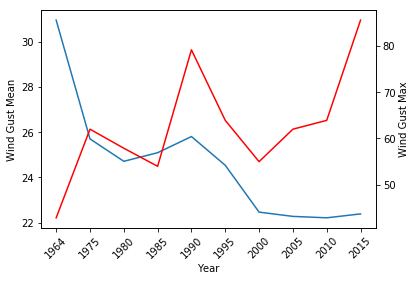

In [45]:
fig, ax1 = plt.subplots()
ax1.plot(k2_gust[::5,0], k2_gust[::5,1], label="Wind Gust")
ax2 = ax1.twinx()
ax2.plot(k2_gust_max[::5,0], k2_gust_max[::5,1], label="Wind Gust Max", color='red')
ax1.set_xlabel("Year")
ax1.set_ylabel("Wind Gust Mean")
ax2.set_ylabel("Wind Gust Max")
ax1.set_xticklabels(k2_gust_max[::5,0],rotation=45)
plt.show()